In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

## ExcelからDataを読み込む

/Users/tobiuo/learning/machine-learning/venv/lib/python3.8/site-packages/openpyxl/worksheet/_reader.py:312: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


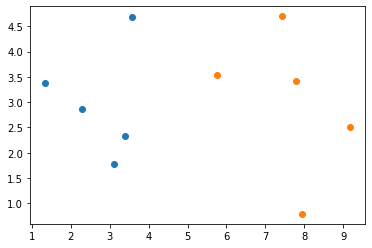

In [2]:
# Excel内の画像などは読み込めないというwarningが出るが, dataは読み込めているため無視する. 
data = pd.read_excel("11-GaussianNaiveBayes.xlsx", usecols=[0, 1, 2], header=3)[:10].astype(np.float64)
data0 = data[:5]
data1 = data[5:]
plt.scatter(data0.X1, data0.X2)
plt.scatter(data1.X1, data1.X2)

## pdf関数を定義する
$pdf(x, mean, sd) = \frac{1}{\sqrt{2 \times \pi} \times sd} \times e^{-(\frac{(x - mean)^2}{2 \times sd^2})}$

In [3]:
def pdf(x, mean, std):
     return 1 / (np.sqrt(2 * np.pi) * std) * np.exp(-(x - mean)**2 / (2 * std**2))

## pdf関数を用いてclassを予測する

In [4]:
# 統計量を予め計算する. 
p0 = len(data0) / len(data)
p1 = len(data1) / len(data)
means = [np.mean(data0.X1), np.mean(data0.X2), np.mean(data1.X1), np.mean(data1.X2)]
stds = [np.std(data0.X1, ddof=1), np.std(data0.X2, ddof=1), np.std(data1.X1, ddof=1), np.std(data1.X2, ddof=1)]

In [5]:
y0 = pdf(data.X1, means[0], stds[0]) * pdf(data.X2, means[1], stds[1]) * p0
y1 = pdf(data.X1, means[2], stds[2]) * pdf(data.X2, means[3], stds[3]) * p1
predict = np.where(y0 > y1, 0, 1)

for i in range(len(predict)):
    print(str(y0[i]) +'\t'+ str(y1[i]) +'\t'+ str(predict[i]))

0.05032427673372075	0.00011557718380278686	0
0.03891229878967956	4.0257123132417305e-05	0
0.023541957690525077	1.0677123311741797e-07	0
0.016404353839568925	0.00010893052118588354	0
0.06797274932849018	3.89292073584926e-06	0
6.919582110595225e-08	0.02202729913417614	1
0.00036240188135671384	0.013133373826492557	1
2.44629984336952e-12	0.018937264964934242	1
2.548609062340938e-08	0.04197206998128321	1
1.5425966122045786e-09	0.013636752788099475	1


## 精度を確かめる

In [6]:
accuracy = (predict == data.Y).sum() / len(data)
print(str(accuracy * 100) + '%')

100.0%
